<a href="https://colab.research.google.com/github/yehormasalitin/colab-notebooks/blob/main/2-3-9-AssignmentQuestion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Create a CNN to classify Cifar-10

Learn about Cifar-10 here: https://www.cs.toronto.edu/~kriz/cifar.html

In class you saw how to build a Convolutional Neural Network that classified Fashion MNIST. Take what you learned to build a CNN that recognizes the 10 classes of CIFAR. It will be a similar network, but there are some key differences you'll need to take into account.

First, while MNIST were 28x28 monochome images (1 color channel), CIFAR are 32x32 color images (3 color channels).

Second, MNIST images are simple, containing just the object, centered in the image, with no background. CIFAR ones can have the object with a background -- for example airplanes might have a cloudy sky behind them! As such you should expect your accuracy to be a bit lower.

We start by setting up the problem for you.

In [10]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalize pixel values to be between 0 and 1
train_images=train_images.reshape(50000, 32, 32, 3)
train_images = train_images / 255.0

test_images=test_images.reshape(10000, 32, 32, 3)
test_images=test_images/255.0

We then definte some of the model for you but leave most of it for you to fill in!

*A hint: your model may want to learn some high level features and then classify them.*

In [11]:
FIRST_LAYER = tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(32, 32, 3))
HIDDEN_LAYER_TYPE_1 = tf.keras.layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_2 = tf.keras.layers.Conv2D(128, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_3 = tf.keras.layers.Conv2D(32, (3,3), activation='relu')
HIDDEN_LAYER_TYPE_4 = tf.keras.layers.MaxPooling2D(2, 2)
HIDDEN_LAYER_TYPE_5 = tf.keras.layers.Dense(20, activation='relu')
LAST_LAYER = tf.keras.layers.Dense(10, activation='softmax')

model = models.Sequential([
       FIRST_LAYER,
       HIDDEN_LAYER_TYPE_1,
       HIDDEN_LAYER_TYPE_2,
       HIDDEN_LAYER_TYPE_3,
       HIDDEN_LAYER_TYPE_4,
       layers.Flatten(),
       HIDDEN_LAYER_TYPE_5,
       LAST_LAYER,
])

You then need to define loss function. And you can then train your model. Once training is done you'll see a plot of training and validation accuracy. You'll know you have a reasonable model with a reasonable loss funciton if your final training accuracy ends up in the 70s (or possibly higher).

*A hint: your model may want to learn different categories.*

Epoch 1/20
1563/1563 [==============================] - 14s 7ms/step - loss: 2.1251 - accuracy: 0.2138 - val_loss: 1.9189 - val_accuracy: 0.3147
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.7749 - accuracy: 0.3514 - val_loss: 1.7191 - val_accuracy: 0.3912
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5650 - accuracy: 0.4336 - val_loss: 1.5280 - val_accuracy: 0.4529
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4462 - accuracy: 0.4762 - val_loss: 1.4152 - val_accuracy: 0.4850
Epoch 5/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3580 - accuracy: 0.5128 - val_loss: 1.3566 - val_accuracy: 0.5114
Epoch 6/20
1563/1563 [==============================] - 8s 5ms/step - loss: 1.2830 - accuracy: 0.5416 - val_loss: 1.3678 - val_accuracy: 0.5055
Epoch 7/20
1563/1563 [==============================] - 11s 7ms/step - loss: 1.2262 - accuracy: 0.5657 - val_loss: 1.2986 - val_accurac

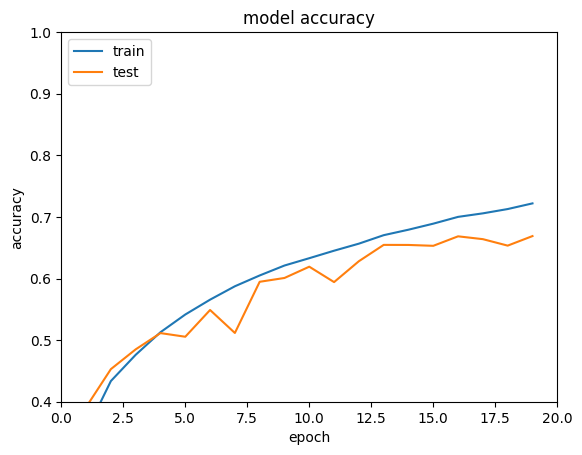

In [12]:
LOSS = 'sparse_categorical_crossentropy'
NUM_EPOCHS = 20 #You can change this value if you like to experiment with it to get better accuracy

# Compile the model
model.compile(optimizer='sgd',
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()

Finally, pick a better optimizer. And re-train your model. You'll know you have a reasonable model with a reasonable loss funciton and optimizer if your final training accuracy ends up in the 80s (or possibly higher).

*A hint: your model may want to learn adaptively.*

Epoch 1/20
1563/1563 [==============================] - 10s 5ms/step - loss: 0.9224 - accuracy: 0.6782 - val_loss: 1.0132 - val_accuracy: 0.6544
Epoch 2/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.8422 - accuracy: 0.7059 - val_loss: 0.9193 - val_accuracy: 0.6812
Epoch 3/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7745 - accuracy: 0.7293 - val_loss: 0.9403 - val_accuracy: 0.6835
Epoch 4/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.7134 - accuracy: 0.7521 - val_loss: 0.8675 - val_accuracy: 0.7085
Epoch 5/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6604 - accuracy: 0.7686 - val_loss: 0.8612 - val_accuracy: 0.7141
Epoch 6/20
1563/1563 [==============================] - 9s 6ms/step - loss: 0.6141 - accuracy: 0.7846 - val_loss: 0.9349 - val_accuracy: 0.6961
Epoch 7/20
1563/1563 [==============================] - 8s 5ms/step - loss: 0.5698 - accuracy: 0.7998 - val_loss: 0.9293 - val_accuracy

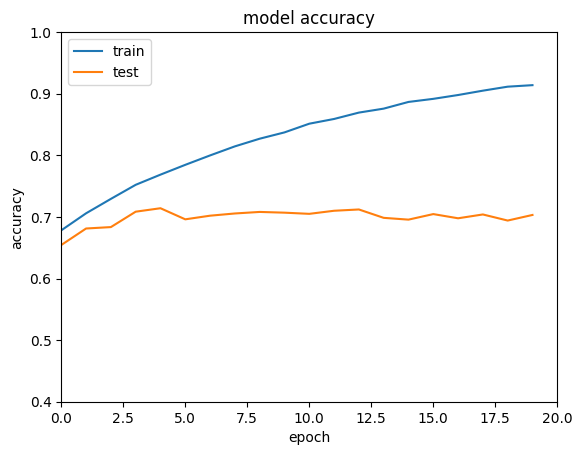

In [13]:
OPTIMIZER = 'adam'

# Compile the model
model.compile(optimizer=OPTIMIZER,
              loss=LOSS,
              metrics=['accuracy'])

# Fit the model
history = model.fit(train_images, train_labels, epochs=NUM_EPOCHS,
                    validation_data=(test_images, test_labels))

# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.xlim([0,NUM_EPOCHS])
plt.ylim([0.4,1.0])
plt.show()